In [1]:
a = [ "the cats are in the house"
,"the dogs are in the house and outside"
,"the cats and dogs are friendly"]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
v = TfidfVectorizer(
    stop_words='english', 
    lowercase=True,
    ngram_range=(1, 2),
    max_features=15,
    min_df=1,
    max_df=0.85
)

x = v.fit_transform(a) 
words = v.get_feature_names_out()


In [4]:
words

array(['cats', 'cats dogs', 'cats house', 'dogs', 'dogs friendly',
       'dogs house', 'friendly', 'house', 'house outside', 'outside'],
      dtype=object)

In [5]:
tf = pd.DataFrame(x.toarray(), columns=words)
tf

,cats,cats dogs,cats house,dogs,dogs friendly,dogs house,friendly,house,house outside,outside
0,0.517856,0.000000,0.680919,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.373022,0.000000,0.490479,0.000000,0.373022,0.490479,0.490479
2,0.373022,0.490479,0.000000,0.373022,0.490479,0.000000,0.490479,0.000000,0.000000,0.000000


In [6]:
idf_vals = v.idf_
idf_df = pd.DataFrame(idf_vals, index=words, columns=['IDF'])
idf_df

,IDF
cats,1.287682
cats dogs,1.693147
cats house,1.693147
dogs,1.287682
dogs friendly,1.693147
dogs house,1.693147
friendly,1.693147
house,1.287682
house outside,1.693147
outside,1.693147


In [7]:
tfidf_df = pd.DataFrame(x.toarray(), columns=words)
tfidf_df

,cats,cats dogs,cats house,dogs,dogs friendly,dogs house,friendly,house,house outside,outside
0,0.517856,0.000000,0.680919,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.373022,0.000000,0.490479,0.000000,0.373022,0.490479,0.490479
2,0.373022,0.490479,0.000000,0.373022,0.490479,0.000000,0.490479,0.000000,0.000000,0.000000


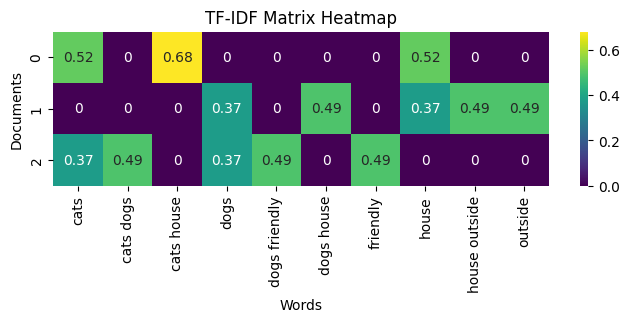

In [8]:
plt.figure(figsize=(8, 2))
sns.heatmap(tfidf_df, annot=True, cmap='viridis', cbar=True)
plt.title('TF-IDF Matrix Heatmap')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

In [9]:
docs = [
    "Barack Obama was born in Hawaii. Barack Obama was born in.  He was the 44th President of the United States.",
    "Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino, California.",
    "Python is a programming language used widely in data science."
]

In [11]:
import nltk
import spacy
from nltk.util import ngrams
from collections import Counter

nlp = spacy.load("en_core_web_sm")


In [12]:
for i, doc in enumerate(docs):
    print(f"Document {i+1}: {doc}")
    parsec_doc = nlp(doc)
    for ent in parsec_doc.ents:
        print(f"Entity: {ent.text}, Label: {ent.label_}")

Document 1: Barack Obama was born in Hawaii. Barack Obama was born in.  He was the 44th President of the United States.
Entity: Barack Obama, Label: PERSON
Entity: Hawaii, Label: GPE
Entity: Barack Obama, Label: PERSON
Entity: 44th, Label: ORDINAL
Entity: the United States, Label: GPE
Document 2: Apple Inc. was founded by Steve Jobs and is headquartered in Cupertino, California.
Entity: Apple Inc., Label: ORG
Entity: Steve Jobs, Label: PERSON
Entity: Cupertino, Label: GPE
Entity: California, Label: GPE
Document 3: Python is a programming language used widely in data science.


In [14]:
for i, doc in enumerate(docs):
    print(f"\nDocument {i+1}:")

    tokens = nltk.word_tokenize(doc.lower())
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))

    print(f"Bigrams: {Counter(bigrams).most_common(5)}")
    print(f"Trigrams: {Counter(trigrams).most_common(5)}")


Document 1:
Bigrams: [(('barack', 'obama'), 2), (('obama', 'was'), 2), (('was', 'born'), 2), (('born', 'in'), 2), (('in', 'hawaii'), 1)]
Trigrams: [(('barack', 'obama', 'was'), 2), (('obama', 'was', 'born'), 2), (('was', 'born', 'in'), 2), (('born', 'in', 'hawaii'), 1), (('in', 'hawaii', '.'), 1)]

Document 2:
Bigrams: [(('apple', 'inc.'), 1), (('inc.', 'was'), 1), (('was', 'founded'), 1), (('founded', 'by'), 1), (('by', 'steve'), 1)]
Trigrams: [(('apple', 'inc.', 'was'), 1), (('inc.', 'was', 'founded'), 1), (('was', 'founded', 'by'), 1), (('founded', 'by', 'steve'), 1), (('by', 'steve', 'jobs'), 1)]

Document 3:
Bigrams: [(('python', 'is'), 1), (('is', 'a'), 1), (('a', 'programming'), 1), (('programming', 'language'), 1), (('language', 'used'), 1)]
Trigrams: [(('python', 'is', 'a'), 1), (('is', 'a', 'programming'), 1), (('a', 'programming', 'language'), 1), (('programming', 'language', 'used'), 1), (('language', 'used', 'widely'), 1)]


### text classification and clustering

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

nltk

<module 'nltk' from 'c:\\Users\\shrey\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\nltk\\__init__.py'>

In [17]:
texts = [
    "Barack Obama was born in Hawaii.",
    "Apple Inc. was founded by Steve Jobs.",
    "Python is a powerful programming language.",
    "Microsoft was founded by Bill Gates.",
    "The United Nations is based in New York.",
    "New York is a major tech hub."
]
labels = [1, 1, 0, 1, 1, 0]  # 1 = org/person-based, 0 = neutral/technical


In [24]:
texts += [
    "Elon Musk founded SpaceX to revolutionize space travel.",  # 1
    "The Eiffel Tower is a famous landmark in Paris.",           # 0
    "Google was created by Larry Page and Sergey Brin.",         # 1
    "C++ is widely used in systems programming.",                # 0
    "NASA launched the Artemis program to return to the Moon.",  # 1
    "Blockchain is a decentralized digital ledger.",             # 0
    "Amazon was started by Jeff Bezos in a garage.",             # 1
    "Water boils at 100 degrees Celsius at sea level.",          # 0
    "Mark Zuckerberg is the CEO of Meta Platforms.",             # 1
    "The Internet of Things connects everyday devices.",          # 0
    "Satya Nadella leads Microsoft as its CEO.",                 # 1
    "Machine learning models require large datasets.",           # 0
    "The World Health Organization combats global diseases.",    # 1
    "5G technology enables faster mobile internet speeds.",       # 0
    "Tesla produces electric cars and solar products.",          # 1
    "Virtual reality is used in gaming and education.",           # 0
    "Tim Cook took over as Apple’s CEO after Steve Jobs.",       # 1
    "Cloud computing allows access to data from anywhere.",       # 0
    "Malala Yousafzai advocates for girls' education.",          # 1
    "A compiler translates source code into machine code.",       # 0
    "Sundar Pichai is the CEO of Alphabet Inc.",                 # 1
    "Photosynthesis converts sunlight into chemical energy.",     # 0
    "The Red Cross provides humanitarian aid worldwide.",        # 1
    "Encryption ensures secure communication over networks.",     # 0
    "Oprah Winfrey is a renowned media executive and host."      # 1
]

labels += [
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
    1, 0, 1, 0, 1
]

In [25]:
v = TfidfVectorizer()

x = v.fit_transform(texts)
x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 220 stored elements and shape (31, 165)>

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.5, random_state=63)
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [30]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(x)

for i, pred in enumerate(clusters):
    print(f"Document {i+1} is in cluster {pred}")

Document 1 is in cluster 0
Document 2 is in cluster 1
Document 3 is in cluster 0
Document 4 is in cluster 0
Document 5 is in cluster 0
Document 6 is in cluster 0
Document 7 is in cluster 0
Document 8 is in cluster 0
Document 9 is in cluster 0
Document 10 is in cluster 0
Document 11 is in cluster 0
Document 12 is in cluster 0
Document 13 is in cluster 0
Document 14 is in cluster 0
Document 15 is in cluster 1
Document 16 is in cluster 0
Document 17 is in cluster 1
Document 18 is in cluster 0
Document 19 is in cluster 0
Document 20 is in cluster 0
Document 21 is in cluster 0
Document 22 is in cluster 0
Document 23 is in cluster 1
Document 24 is in cluster 0
Document 25 is in cluster 0
Document 26 is in cluster 0
Document 27 is in cluster 1
Document 28 is in cluster 0
Document 29 is in cluster 0
Document 30 is in cluster 1
Document 31 is in cluster 0


In [32]:
from sklearn.metrics import silhouette_score

s = silhouette_score(x, clusters)
print(f"Silhouette Score: {s:.3f}")

Silhouette Score: 0.010
